In [76]:
import numpy as np
import yfinance as yf
import pandas as pd
import ta
import matplotlib.pyplot as plt
import datetime as dt

In [77]:
stock = 'NFLX'
endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days=2000)
df = yf.download(stock, startDate, endDate)

df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-03-06,141.000000,142.839996,140.539993,141.940002,141.940002,7116100
2017-03-07,141.990005,142.399994,140.380005,141.429993,141.429993,4241000
2017-03-08,141.470001,142.059998,139.770004,140.320007,140.320007,4085500
2017-03-09,140.039993,141.240005,139.740005,140.529999,140.529999,2652700
2017-03-10,141.389999,141.800003,140.279999,140.889999,140.889999,3318500
...,...,...,...,...,...,...
2022-08-22,232.550003,233.479996,224.589996,226.539993,226.539993,8630100
2022-08-23,226.460007,229.899994,224.300003,224.550003,224.550003,5276900
2022-08-24,225.660004,234.100006,223.940002,229.610001,229.610001,5426300


In [78]:
df['ma20'] = df.Close.rolling(20).mean()
df['vol20'] = df.Close.rolling(20).std()
df['upper_bb20'] = df.ma20 + (2 * df.vol20)
df['lower_bb20'] = df.ma20 - (2 * df.vol20)

df

,Open,High,Low,Close,Adj Close,Volume,ma20,vol20,upper_bb20,lower_bb20
Date,,,,,,,,,,
2017-03-06,141.000000,142.839996,140.539993,141.940002,141.940002,7116100,NaN,NaN,NaN,NaN
2017-03-07,141.990005,142.399994,140.380005,141.429993,141.429993,4241000,NaN,NaN,NaN,NaN
2017-03-08,141.470001,142.059998,139.770004,140.320007,140.320007,4085500,NaN,NaN,NaN,NaN
2017-03-09,140.039993,141.240005,139.740005,140.529999,140.529999,2652700,NaN,NaN,NaN,NaN
2017-03-10,141.389999,141.800003,140.279999,140.889999,140.889999,3318500,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-08-22,232.550003,233.479996,224.589996,226.539993,226.539993,8630100,233.5495,10.300139,254.149779,212.949222
2022-08-23,226.460007,229.899994,224.300003,224.550003,224.550003,5276900,234.0815,9.474023,253.029546,215.133454
2022-08-24,225.660004,234.100006,223.940002,229.610001,229.610001,5426300,234.2245,9.378642,252.981784,215.467216


<AxesSubplot:xlabel='Date'>

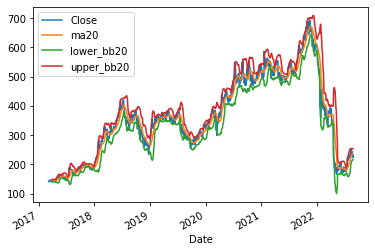

In [79]:
df[['Close','ma20','lower_bb20','upper_bb20']].plot()

In [80]:
df['rsi'] = ta.momentum.rsi(df.Close, window = 6)

In [81]:
conditions = [(df.rsi < 30) & (df.Close < df.lower_bb20),
              (df.rsi > 70) & (df.Close > df.upper_bb20)]

choices = ['Buy','Sell']

df['signal'] = np.select(conditions,choices)
df.dropna(inplace=True)
df

,Open,High,Low,Close,Adj Close,Volume,ma20,vol20,upper_bb20,lower_bb20,rsi,signal
Date,,,,,,,,,,,,
2017-03-31,148.000000,148.229996,147.330002,147.809998,147.809998,3888200,143.645000,2.318614,148.282228,139.007771,75.506613,0
2017-04-03,146.699997,148.009995,145.740005,146.919998,146.919998,4609300,143.893999,2.392115,148.678229,139.109770,64.482542,0
2017-04-04,146.839996,147.089996,144.889999,145.500000,145.500000,4368900,144.097500,2.344105,148.785709,139.409291,50.395290,0
2017-04-05,146.190002,146.250000,143.259995,143.619995,143.619995,4607600,144.262499,2.174200,148.610899,139.914099,37.410608,0
2017-04-06,144.000000,144.139999,143.009995,143.740005,143.740005,3312400,144.423000,1.995284,148.413568,140.432432,38.622029,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-22,232.550003,233.479996,224.589996,226.539993,226.539993,8630100,233.549500,10.300139,254.149779,212.949222,31.810586,0
2022-08-23,226.460007,229.899994,224.300003,224.550003,224.550003,5276900,234.081500,9.474023,253.029546,215.133454,29.840201,0
2022-08-24,225.660004,234.100006,223.940002,229.610001,229.610001,5426300,234.224500,9.378642,252.981784,215.467216,40.992561,0


In [82]:
df.signal = df.signal.shift()
position = False
buydates, selldates = [], []
buyprices, sellprices = [], []
df['shiftedClose'] = df.Close.shift()

In [83]:
for index,row in df.iterrows():
    if not position and row['signal'] == 'Buy':
        buydates.append(index)
        buyprices.append(row.Open)
        position = True
    if position:
        if row['signal'] == 'Sell' or row.shiftedClose < 0.95 * buyprices[-1]:
            selldates.append(index)
            sellprices.append(row.Open)
            position = False

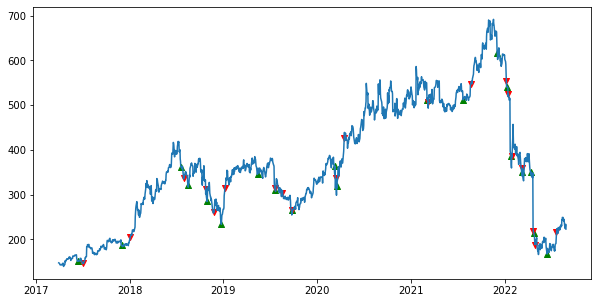

In [84]:
plt.figure(figsize=(10,5))
plt.plot(df.Close)
plt.scatter(df.loc[buydates].index, df.loc[buydates].Close, marker='^', c ='g')
plt.scatter(df.loc[selldates].index, df.loc[selldates].Close, marker='v', c ='r')

In [85]:
(pd.Series([(sell - buy) / buy for sell,buy in zip(sellprices,buyprices)]) + 1).prod() - 1

-0.34897618144991305